In [27]:
import cmdstanpy as stan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm


In [98]:
model_logreg = stan.from_csv('inference/logreg/*[1-4].csv')
model_hier = stan.from_csv('inference/hier/*[1-4].csv')

In [103]:
theta_logreg = model_logreg.stan_variables()['theta']
theta_hier = model_hier.stan_variable('theta')

def inv_logit(t):
    return 1/(1 + np.exp(-t))

that_logreg = inv_logit(theta_logreg).mean(axis=0)
that_hier = inv_logit(theta_hier).mean(axis=0)


In [41]:
from modelling.util.data_loader import load_data
y = load_data()['heart_disease'].values

In [132]:
def points_to_plot(y, theta_hat):
    parts = 10
    df = pd.DataFrame(dict(y=y, theta=theta_hat))
    df = df.sort_values(by='theta')
    summary = []
    ps = np.linspace(0, 1, parts + 1)
    for i in np.arange(parts):
        low, high = ps[[i, i+1]]
        df_slice = df[df.theta.between(low, high)]
        summary.append(pd.Series(dict(
            mean_theta = df_slice.theta.mean(),
            mean_y = df_slice.y.mean(),
            sem_y = df_slice.y.std() / df_slice.shape[0] ** 0.5,
        )))
    summary = pd.concat(summary, axis=1).transpose()

    fig, ax = plt.subplots(figsize=(6, 6))
    y_offsets = np.random.normal(0, scale=0.005, size=df.shape[0])
    ax.scatter(df.theta, df.y + y_offsets, s=8, alpha=1, color='#000')
    ax.plot([0, 1], [0, 1], linestyle='--', dashes=(5, 5), linewidth=1, color='#666')
    ax.errorbar(summary.mean_theta, summary.mean_y, summary.sem_y, capsize=5, color='#000', fmt='o')
    return fig, ax

/var/folders/nc/dhtws2m1317bwzbsxq9n3_gc0000gn/T/ipykernel_7589/3635694086.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


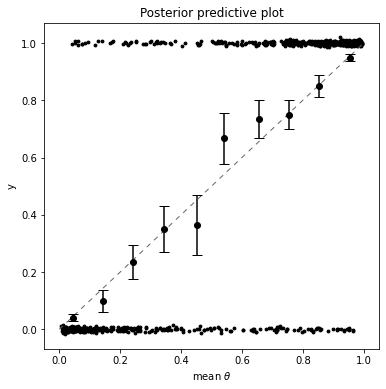

In [134]:
fig, ax = points_to_plot(y, that_logreg)

ax.set_title('Posterior predictive plot')
ax.set_xlabel(r'mean $\theta$')
ax.set_ylabel('y')
fig.show()

In [122]:
fig.suptitle('Posterior predictive')
fig.show()

/var/folders/nc/dhtws2m1317bwzbsxq9n3_gc0000gn/T/ipykernel_7589/511603565.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


/var/folders/nc/dhtws2m1317bwzbsxq9n3_gc0000gn/T/ipykernel_7589/3089155139.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  points_to_plot(y, that_hier).show()


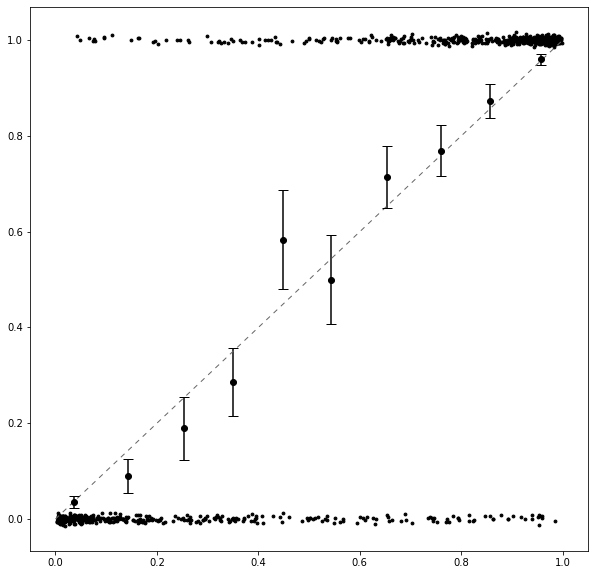

In [116]:
points_to_plot(y, that_hier).show()